<a href="https://colab.research.google.com/github/PolarisJIAJINHAO/Warwick-NLP-Dissertation/blob/main/Google_NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First, we need to load the dataset into Google Colab.
# This statement allows you to select the file from your laptop and upload it to Google Cloud.
# Please wait until you see 100% done and the play button is resumed. it might take a while to upload because the dataset is large

# Import necessary Python libraries
from google.colab import files

#Upload the dataset to Google Colab
uploaded = files.upload()

Saving NLP_Reddit_comment_1.csv to NLP_Reddit_comment_1.csv


In [ ]:
# once you upload the data to the cloud, you can read the data into dataframe.
# Remember, if you close the notebook or disconnect, you need to upload the file (run the code above) again before you read data.

import pandas as pd

data = 'NLP_Reddit_comment_1.csv'
df = pd.read_csv(
    data,
    encoding='cp1252',
    engine='python',
    on_bad_lines='warn',
    encoding_errors='replace'
)
df.head()

,keyword,post_title,post_comment_count,comment,comment_time,upvotes,clean_comment
0,afk,Professor Akali intentionally feeding and goin...,2072,Are we forgetting that the account is also bot...,2020/9/29 11:26,10034,are we forgetting that the account is also bot...
1,afk,Jackeylove going afk in EU soloq after he got ...,1371,look what just a month of EUW soloq does to pe...,2019/10/30 17:36,8557,look what just a month of euw soloq does to pe...
2,afk,"Tarzaned runs it down then afks, ending the ga...",2622,FYI tarzaned just linked it on discord to mass...,2019/8/8 23:53,7644,fyi tarzaned just linked it on discord to mass...
3,afk,AFK warning despite clearly being active and t...,929,"""We removed Teemos invisibility to fix a bug w...",2023/2/22 7:33,6066,we removed teemos invisibility to fix a bug wh...
4,afk,People that go afk and spamm FF15 in Ranked sh...,2173,My favorite is when someone picks late game hy...,2020/2/11 19:21,4949,my favorite is when someone picks late game hy...


In [ ]:
# Change your target_column to the column with review data

target_column = 'clean_comment'

## **2. Text cleaning**

In [ ]:
# drop data with missing values in the 'content' column (target_column)
df = df.dropna(subset=[target_column])

In [ ]:
# convert the relevant column to lowercase
df[target_column] = df[target_column].str.lower()

In [ ]:
# remove contraction
!pip install contractions
import contractions
df[target_column] = df[target_column].map(lambda x: contractions.fix(x))

# Remove unwanted characters/objects (e.g. url, email, emoji etc.). You don't need to run all of them, but just take the ones suitable for your case.
# import the re library. Re is a built-in python package, which can be used to work with Regular Expressions.

import re

# Remove new line characters ("/n")

df[target_column] = df[target_column].map(lambda x: re.sub('\s+', ' ', x))

# Remove url link
df[target_column] = df[target_column].apply(lambda x: re.sub('http://\S+|https://\S+', '', x))

# Remove email address
df[target_column] = df[target_column].map(lambda x: re.sub('\S*@\S*\s?', '', x))

# Remove emoji
# First, build a list of commonly used emojis
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

# Then remove the emoji
df[target_column] = df[target_column].map(lambda x: re.sub(emoj, ' ', x))

# Remove non-word characters, so numbers and ___ etc
df[target_column] = df[target_column].str.replace("[^A-Za-z]", " ", regex = True)

# Remove overspace
df[target_column] = df[target_column].map(lambda x: re.sub('\s{2,}', " ", x))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.9 MB/s eta 0:00:00


In [ ]:
df.head()

,keyword,post_title,post_comment_count,comment,comment_time,upvotes,clean_comment
0,afk,Professor Akali intentionally feeding and goin...,2072,Are we forgetting that the account is also bot...,2020/9/29 11:26,10034,are we forgetting that the account is also bot...
1,afk,Jackeylove going afk in EU soloq after he got ...,1371,look what just a month of EUW soloq does to pe...,2019/10/30 17:36,8557,look what just a month of euw soloq does to pe...
2,afk,"Tarzaned runs it down then afks, ending the ga...",2622,FYI tarzaned just linked it on discord to mass...,2019/8/8 23:53,7644,fyi tarzaned just linked it on discord to mass...
3,afk,AFK warning despite clearly being active and t...,929,"""We removed Teemos invisibility to fix a bug w...",2023/2/22 7:33,6066,we removed teemos invisibility to fix a bug wh...
4,afk,People that go afk and spamm FF15 in Ranked sh...,2173,My favorite is when someone picks late game hy...,2020/2/11 19:21,4949,my favorite is when someone picks late game hy...


## **3. Using Google Natural Language API to do sentiment analysis**
The powerful pre-trained models of the Natural Language API empowers developers to easily apply natural language understanding (NLU) to their applications with features including sentiment analysis, entity analysis, entity sentiment analysis, content classification, and syntax analysis.

### 3.1 Enable API and create credentials

First, you need to enable Google Natural Language API in Google Cloud. Please search for "Cloud Natural Language API" and then click "Enable". Once enabled, there should be a dashboard of API. Please click "Credidentials" on the left menu. Then click "+ CREATE CREDENTIALS" on the top menu. Please choose "Service account". Give it a name for your service account and then continue. Set the role as "Editor" and press continue and done. Once the service account set up. You need to click into the service account and then click "Keys". We need to "add key" - choose "create new key" and then a json file will be downloaded to your laptop. We will need to upload this key file.

### 3.2 Authentication

To connect with API and interact with Google Cloud Natural Language API, we need to get authentication. In this case, we upload our key of the service account we have created and then point to the key file.




In [ ]:
# Replace with your actual project ID
project_id = 'grand-lamp-452717-c2'
!gcloud config set project {project_id}

Updated property [core/project].


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your JSON key file when prompted

Saving grand-lamp-452717-c2-9a9909f98eeb.json to grand-lamp-452717-c2-9a9909f98eeb (2).json


In [ ]:
# Set environment variable to point to the key file
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = '/content/grand-lamp-452717-c2-9a9909f98eeb.json' # please add the path of your key file (json file)

In [ ]:
# Here we test with one text

from google.cloud import language_v2

def analyze_sentiment(text):
    client = language_v2.LanguageServiceClient()

    document = language_v2.Document(
        content=text,
        type_=language_v2.Document.Type.PLAIN_TEXT
    )

    sentiment = client.analyze_sentiment(
        request={"document": document}
    ).document_sentiment

    print(f"Text: {text}")
    print(f"Sentiment score: {sentiment.score:.2f} (-1.0 negative to 1.0 positive)")
    print(f"Sentiment magnitude: {sentiment.magnitude:.2f} (strength of emotion)")

    return sentiment

# Test with a sample text
analyze_sentiment("i really feel bad for a lot of the players in this event they are going to come out feeling like shit about themselves in game because how out matched they will have been to those players its ok keep grinding and learn from the experience")

Text: i really feel bad for a lot of the players in this event they are going to come out feeling like shit about themselves in game because how out matched they will have been to those players its ok keep grinding and learn from the experience
Sentiment score: -0.73 (-1.0 negative to 1.0 positive)
Sentiment magnitude: 0.97 (strength of emotion)


magnitude: 0.968
score: -0.731

In [ ]:
# Now we will run the sentiment analysis for all reviews

import pandas as pd
from google.cloud import language_v2
import time
from tqdm.notebook import tqdm  # For progress tracking in Colab

def analyze_sentiment_batch(df, text_column, batch_size=10):
    """
    Analyze sentiment for texts in a dataframe with batching.
    No async/await is used in this function.

    Args:
        df: DataFrame containing text to analyze
        text_column: Name of the column with text content
        batch_size: Number of texts to process in each batch

    Returns:
        DataFrame with sentiment scores and magnitudes added
    """
    # Initialize the client
    client = language_v2.LanguageServiceClient()

    # Create a copy of the input dataframe
    result_df = df.copy()

    # Initialize sentiment columns
    result_df['sentiment_score'] = None
    result_df['sentiment_magnitude'] = None

    # Get list of texts to process
    texts = df[text_column].tolist()

    # Process in batches
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing batches"):
        # Get current batch
        batch_indices = range(i, min(i + batch_size, len(texts)))

        # Process each text in the batch
        for idx in batch_indices:
            text = texts[idx]

            # Skip empty or non-string entries
            if pd.isna(text) or not isinstance(text, str) or text.strip() == "":
                result_df.loc[df.index[idx], 'sentiment_score'] = None
                result_df.loc[df.index[idx], 'sentiment_magnitude'] = None
                continue

            try:
                # Create document object
                document = language_v2.Document(
                    content=text,
                    type_=language_v2.Document.Type.PLAIN_TEXT
                )

                # Get sentiment
                sentiment = client.analyze_sentiment(
                    request={"document": document}
                ).document_sentiment

                # Store results
                result_df.loc[df.index[idx], 'sentiment_score'] = sentiment.score
                result_df.loc[df.index[idx], 'sentiment_magnitude'] = sentiment.magnitude

            except Exception as e:
                print(f"Error processing text at index {idx}: {str(e)}")
                result_df.loc[df.index[idx], 'sentiment_score'] = None
                result_df.loc[df.index[idx], 'sentiment_magnitude'] = None

        # Add delay between batches to avoid rate limits
        if i + batch_size < len(texts):
            time.sleep(1)  # 1.5 second delay between batches

    return result_df

In [ ]:
# call the above function and define the dataframe where contains the text content you would like to analyse
result_df = analyze_sentiment_batch(df, target_column, batch_size=20)

Processing batches:   0%|          | 0/1848 [00:00<?, ?it/s]

Error processing text at index 210: 400 A sentence in the document exceeded the maximum per-sentence token limit of 512 tokens.
Error processing text at index 876: 400 Cannot determine the language of the document. Please specify the language code of the document. [field_violations {
  field: "document.language_code"
  description: "Cannot determine the language of the document."
}
]
Error processing text at index 2037: 400 A sentence in the document exceeded the maximum per-sentence token limit of 512 tokens.
Error processing text at index 2730: 400 A sentence in the document exceeded the maximum per-sentence token limit of 512 tokens.
Error processing text at index 3402: 400 A sentence in the document exceeded the maximum per-sentence token limit of 512 tokens.
Error processing text at index 3417: 400 A sentence in the document exceeded the maximum per-sentence token limit of 512 tokens.
Error processing text at index 4468: 400 Cannot determine the language of the document. Please sp

In [ ]:
result_df

,keyword,post_title,post_comment_count,comment,comment_time,upvotes,clean_comment,sentiment_score,sentiment_magnitude
0,afk,Professor Akali intentionally feeding and goin...,2072,Are we forgetting that the account is also bot...,2020/9/29 11:26,10034,are we forgetting that the account is also bot...,-0.841,0.916
1,afk,Jackeylove going afk in EU soloq after he got ...,1371,look what just a month of EUW soloq does to pe...,2019/10/30 17:36,8557,look what just a month of euw soloq does to pe...,-0.577,0.774
2,afk,"Tarzaned runs it down then afks, ending the ga...",2622,FYI tarzaned just linked it on discord to mass...,2019/8/8 23:53,7644,fyi tarzaned just linked it on discord to mass...,-0.857,0.941
3,afk,AFK warning despite clearly being active and t...,929,"""We removed Teemos invisibility to fix a bug w...",2023/2/22 7:33,6066,we removed teemos invisibility to fix a bug wh...,-0.31,0.453
4,afk,People that go afk and spamm FF15 in Ranked sh...,2173,My favorite is when someone picks late game hy...,2020/2/11 19:21,4949,my favorite is when someone picks late game hy...,-0.666,0.865
...,...,...,...,...,...,...,...,...,...
36946,pass,"Tarzan: ""My grandfather passed away suddenly d...",20,I'll always remember his BLIND Flash Cocoon on...,2025/6/15 22:24,4,i will always remember his blind flash cocoon ...,0.916,0.976
36947,pass,"Former DRX Coach Kim ""Crush"" Jun-seo has passe...",36,Rest in peace.,2025/5/8 13:43,2,rest in peace,-0.008,0.54
36948,pass,"Tarzan: ""My grandfather passed away suddenly d...",20,"FLY kill T1, MKOI kill AL",2025/6/15 16:56,2,fly kill t1 mkoi kill al,0.082,0.189
36949,pass,"Tarzan: ""My grandfather passed away suddenly d...",20,"Yeah at that time, everyone was saying how he ...",2025/6/18 13:16,1,yeah at that time everyone was saying how he w...,0.938,0.985


In [ ]:
result_df.to_csv('result.csv', index=False)
from google.colab import files
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='sentiment_score', ylabel='Count'>

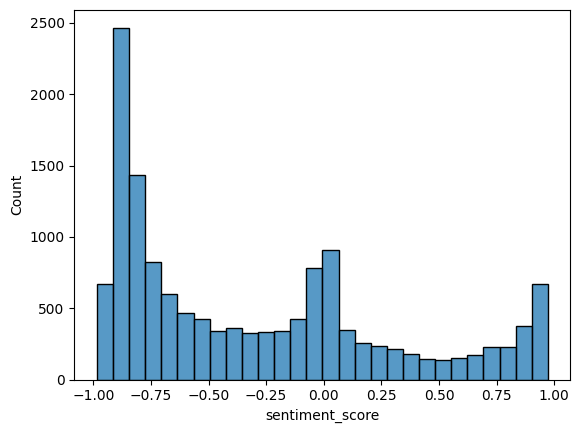

In [ ]:
import matplotlib.pyplot as plt # we use this for visualisation
import seaborn as sns # we use this for visualisation

# distribution plot sentiment_score
sns.histplot(result_df['sentiment_score'])

In [ ]:
# plot the distribution of score while sentiment score is smaller than -0.25 (negative)
sns.histplot(result_df[result_df['sentiment_score']<-0.25]['score'])

KeyError: 'score'

<Axes: xlabel='score', ylabel='Count'>

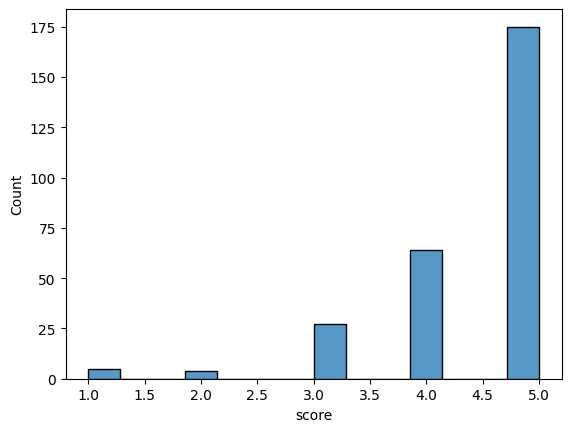

In [ ]:
# plot the distribution of score while sentiment score is larger than 0.25 (positive)
sns.histplot(result_df[result_df['sentiment_score']>0.25]['score'])

Please check this link to understand how to interpret the sentiment analysis values: https://cloud.google.com/natural-language/docs/basics#interpreting_sentiment_analysis_values